# Load Data

In [1]:
import pandas as pd

# Load data utama
df_train = pd.read_csv('mobility_train.csv', parse_dates=['date'])
df_test = pd.read_csv('mobility_test.csv', parse_dates=['date'])

# Tambahkan kolom untuk identifikasi data train/test
df_train['is_train'] = 1
df_test['is_train'] = 0
df_test['trips_thousands'] = None  # Placeholder target

# Gabungkan train dan test untuk preprocessing seragam
df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df_all.drop(columns=['ID'], inplace=True)

df_all.head(5)


C:\Users\User\AppData\Local\Temp\ipykernel_19228\1176541211.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_train, df_test], axis=0, ignore_index=True)


,zone_id,date,trips_thousands,is_train
0,Z029,2025-02-24,291.223641,1
1,Z084,2025-01-27,295.244786,1
2,Z103,2025-01-31,312.233743,1
3,Z061,2025-02-26,296.010680,1
4,Z009,2025-01-17,262.210143,1


In [2]:
df_all.dtypes

zone_id                    object
date               datetime64[ns]
trips_thousands           float64
is_train                    int64
dtype: object

# Explonatory Data Analysis

## Merge All Data Frame

### Merge Aktivitas Urban

In [3]:
bisnis = pd.read_csv('Aktivitas_Urban/business_activity.csv')
event = pd.read_csv('Aktivitas_Urban/event_data.csv')
turis = pd.read_csv('Aktivitas_Urban/tourism_data.csv')
traffic = pd.read_csv('Aktivitas_Urban/traffic_data.csv')

list = [bisnis, event, turis, traffic]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 4)
zone_id              object
date                 object
business_density    float64
retail_count        float64
dtype: object
(18000, 4)
zone_id         object
date            object
event_count    float64
event_type      object
dtype: object
(18000, 3)
zone_id            object
date               object
tourist_visits    float64
dtype: object
(18000, 3)
zone_id               object
date                  object
traffic_congestion    object
dtype: object


In [4]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [5]:
dataframes = [
    ("bisnis", bisnis),
    ("event", event),
    ("turis", turis),
    ("traffic", traffic)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


bisnis: datetime64[ns]
event: datetime64[ns]
turis: datetime64[ns]
traffic: datetime64[ns]


In [6]:
# Mulai dari df_all
df_merged = df_all.copy()

# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L


In [7]:
df_merged.nunique()

zone_id                 200
date                     90
trips_thousands       10000
is_train                  2
business_density      11186
retail_count            180
event_count              10
event_type                3
tourist_visits         1000
traffic_congestion        3
dtype: int64

### Merge Cuaca

In [8]:
air = pd.read_csv('Cuaca/air_quality.csv')
weather = pd.read_csv('Cuaca/weather_conditions.csv')

list = [air, weather]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
air_quality_index    float64
dtype: object
(18000, 4)
zone_id           object
date              object
temperature      float64
precipitation    float64
dtype: object


In [9]:
for df in list:
    df['date'] = pd.to_datetime(df['date'])


In [10]:
dataframes = [
    ("air_quality", air),
    ("weather_conditions", weather)
]

for name, df in dataframes:
    print(f"{name}: {df['date'].dtype}")


air_quality: datetime64[ns]
weather_conditions: datetime64[ns]


In [11]:
# Loop untuk merge
for df in list:
    df_merged = df_merged.merge(df, on=['zone_id', 'date'], how='left')

df_merged.head(5)


,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883


### Merge Demografi

Demografi tidak punya date, hanya punya zone_id

In [12]:
edukasi = pd.read_csv('Demografi/education_data.csv')
resident = pd.read_csv('Demografi/resident_data.csv')
workforce = pd.read_csv('Demografi/workforce_data.csv')

demografi = [edukasi, resident, workforce]

for i in demografi:
        df_merged = df_merged.merge(i, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,air_quality_index,temperature,precipitation,education_level,school_count,resident_count,age_group,employment_rate,commute_preference,workforce_size
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,127.735031,19.038469,NaN,3.299118,49.0,26396.0,Y,0.842074,B,29489.0
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,46.175101,23.644719,16.759688,4.640539,44.0,63573.0,A,0.768560,B,32213.0
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,30.457095,NaN,13.358451,4.558608,NaN,75591.0,Y,0.624985,B,30766.0
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,118.442864,17.573202,8.582613,2.284324,12.0,NaN,S,0.785476,B,36910.0
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,2.988478,29.464600,1.824883,2.789873,40.0,26265.0,Y,0.628162,B,32117.0


### Merge Infrastruktur_Transportasi

In [13]:
bike = pd.read_csv('Infrastruktur_Transportasi/bike_sharing.csv')
parking = pd.read_csv('Infrastruktur_Transportasi/parking_data.csv')
road = pd.read_csv('Infrastruktur_Transportasi/road_network.csv')
transit = pd.read_csv('Infrastruktur_Transportasi/transit_stations.csv')

list = [bike, parking, road, transit]

for i in list:
        print(i.shape)
        print(i.dtypes)

(18000, 3)
zone_id               object
date                  object
bike_availability    float64
dtype: object
(18000, 3)
zone_id              object
date                 object
parking_capacity    float64
dtype: object
(200, 2)
zone_id          object
road_density    float64
dtype: object
(200, 3)
zone_id           object
station_count    float64
transit_type      object
dtype: object


bike_sharing dan parking_data punya zone_id dan date, tapi road_network dan transit_stations hanya punya zone_id

In [14]:
bike['date'] = pd.to_datetime(bike['date'])
parking['date'] = pd.to_datetime(parking['date'])


In [15]:
df_merged = df_merged.merge(bike, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(parking, on=['zone_id', 'date'], how='left')
df_merged = df_merged.merge(road, on = 'zone_id', how = 'left')
df_merged = df_merged.merge(transit, on = 'zone_id', how = 'left')

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,event_type,tourist_visits,traffic_congestion,...,resident_count,age_group,employment_rate,commute_preference,workforce_size,bike_availability,parking_capacity,road_density,station_count,transit_type
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,N,858.0,L,...,26396.0,Y,0.842074,B,29489.0,117.0,316.0,76.884185,10.0,B
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,N,319.0,M,...,63573.0,A,0.768560,B,32213.0,29.0,303.0,61.890157,8.0,T
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,N,375.0,M,...,75591.0,Y,0.624985,B,30766.0,84.0,931.0,29.140185,10.0,B
3,Z061,2025-02-26,296.010680,1,NaN,107.0,8.0,N,797.0,L,...,NaN,S,0.785476,B,36910.0,188.0,455.0,24.544626,9.0,T
4,Z009,2025-01-17,262.210143,1,135.967328,NaN,7.0,N,149.0,L,...,26265.0,Y,0.628162,B,32117.0,67.0,325.0,55.534511,11.0,T


## Distribusi Data

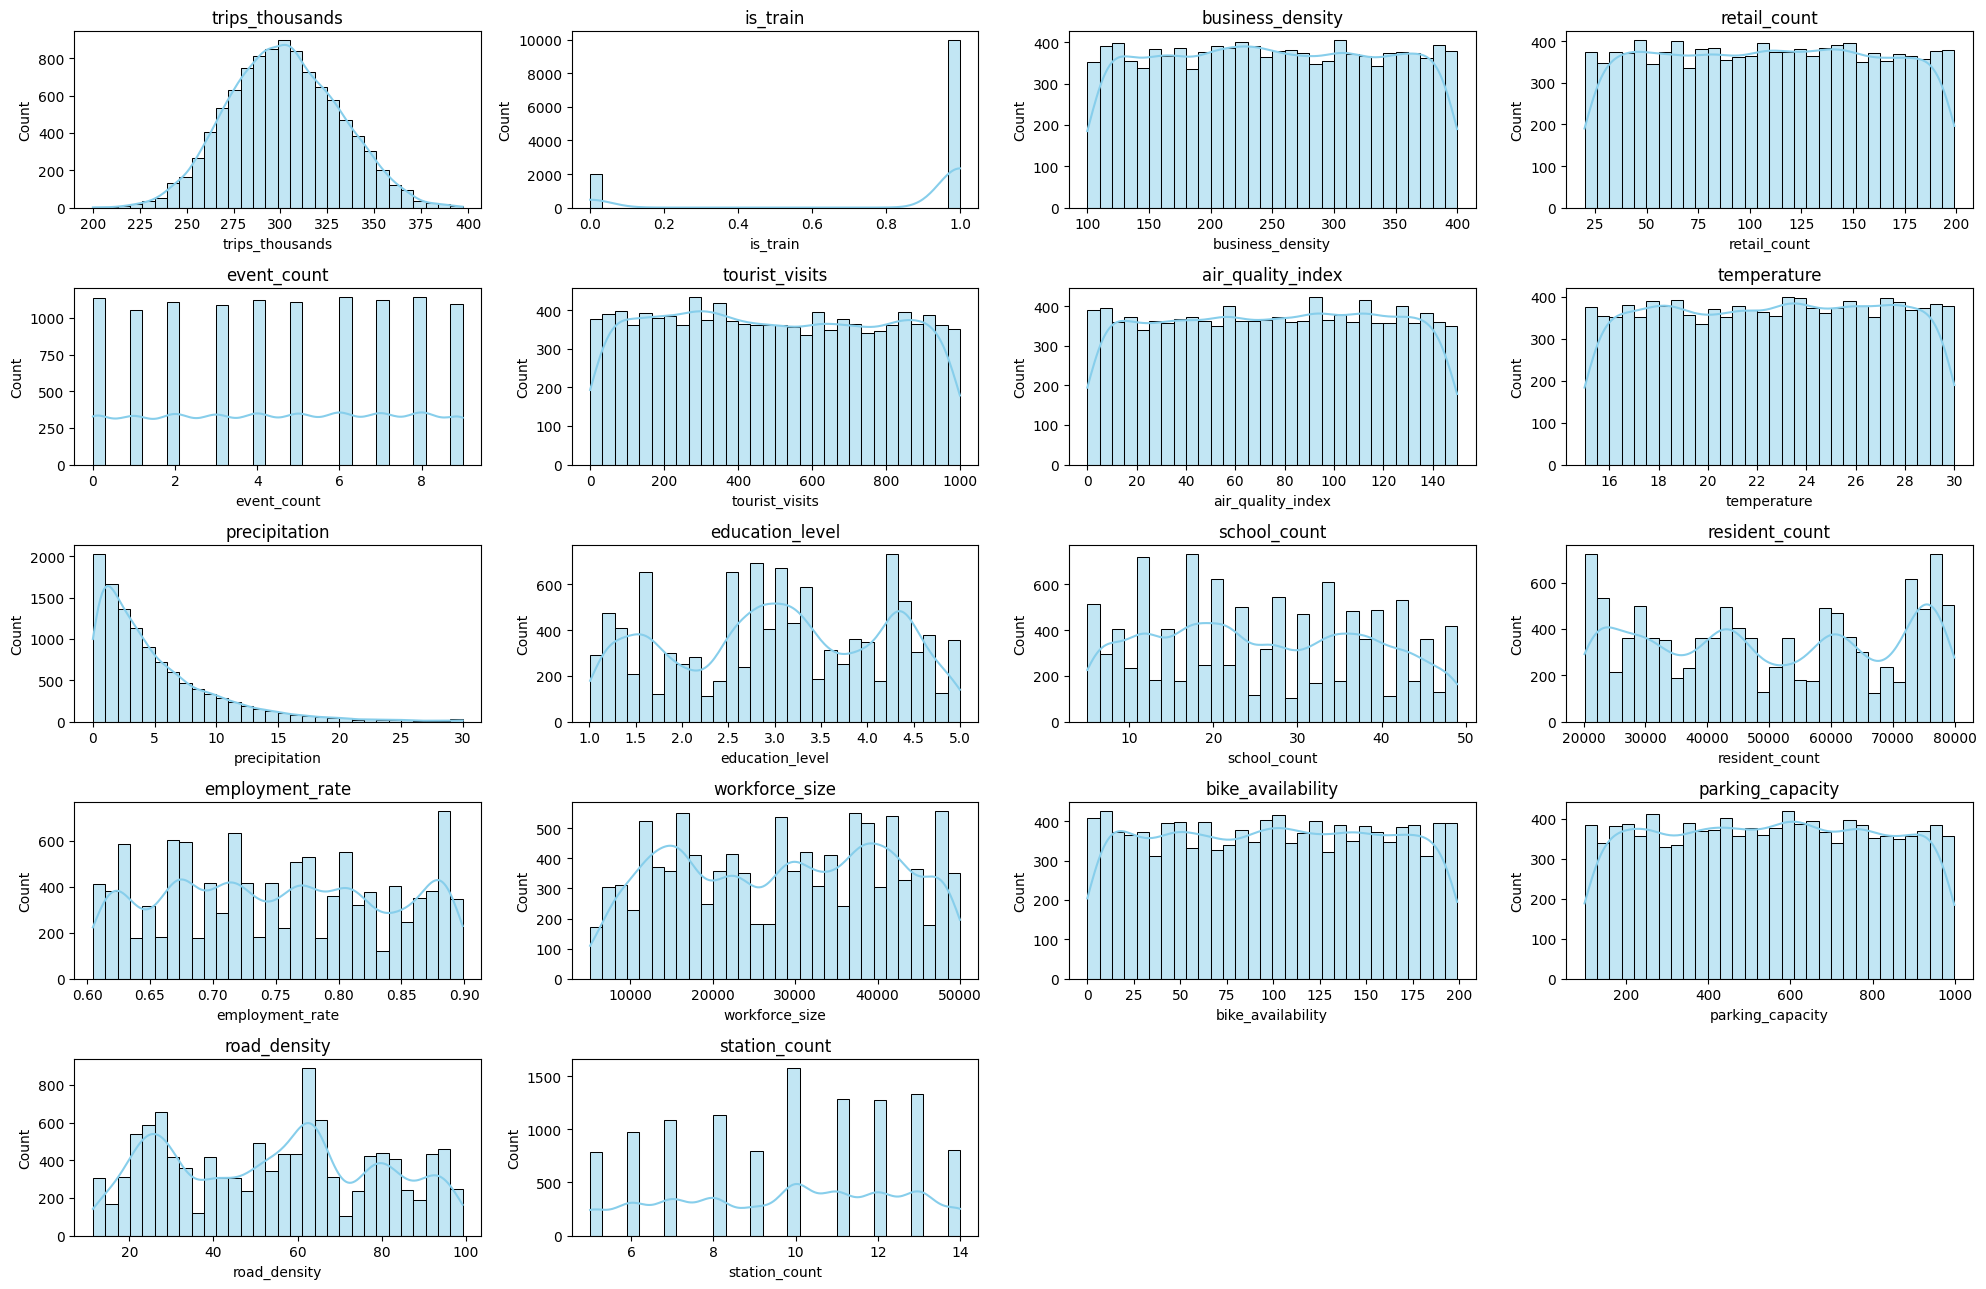

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Deteksi kolom numerik otomatis
num_cols = df_merged.select_dtypes(include='number').columns.tolist()

# Plot histogram
plt.figure(figsize=(20, len(num_cols) * 3 // 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) + 3) // 4, 4, i)
    sns.histplot(df_merged[col], bins=30, kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

## Missing and Duplicate Data

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   zone_id             12000 non-null  object        
 1   date                12000 non-null  datetime64[ns]
 2   trips_thousands     10000 non-null  float64       
 3   is_train            12000 non-null  int64         
 4   business_density    11186 non-null  float64       
 5   retail_count        11158 non-null  float64       
 6   event_count         11132 non-null  float64       
 7   event_type          11166 non-null  object        
 8   tourist_visits      11188 non-null  float64       
 9   traffic_congestion  11105 non-null  object        
 10  air_quality_index   11127 non-null  float64       
 11  temperature         11161 non-null  float64       
 12  precipitation       11159 non-null  float64       
 13  education_level     11023 non-null  float64   

In [18]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
school_count          1149
age_group             1089
workforce_size        1048
resident_count         994
education_level        977
station_count          952
commute_preference     911
traffic_congestion     895
air_quality_index      873
event_count            868
parking_capacity       849
retail_count           842
precipitation          841
temperature            839
bike_availability      839
event_type             834
business_density       814
tourist_visits         812
transit_type           767
employment_rate        601
road_density           594
date                     0
zone_id                  0
is_train                 0
dtype: int64


trips_thousands itu dibiarkan null, karena target class. Kalau diisi, nanti mengganggu distribusi data

In [19]:
# 1. Pisahkan dulu fitur numerik selain target
numerical_cols = df_merged.select_dtypes(include=['number']).columns.drop('trips_thousands')

# 2. Isi missing value hanya untuk kolom numerik (kecuali target)
df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

In [20]:
print(df_merged.isna().sum().sort_values(ascending=False))

trips_thousands       2000
age_group             1089
commute_preference     911
traffic_congestion     895
event_type             834
transit_type           767
zone_id                  0
is_train                 0
date                     0
tourist_visits           0
event_count              0
retail_count             0
business_density         0
precipitation            0
education_level          0
temperature              0
air_quality_index        0
resident_count           0
school_count             0
workforce_size           0
employment_rate          0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
dtype: int64


In [21]:
# Pilih kolom kategorikal (object atau kategori)
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns

# Isi missing value dengan modus
for col in categorical_cols:
    if df_merged[col].isna().any():
        mode_value = df_merged[col].mode()[0]
        df_merged[col] = df_merged[col].fillna(mode_value)

print(df_merged.isna().sum().sort_values(ascending=False))


trips_thousands       2000
zone_id                  0
date                     0
is_train                 0
business_density         0
retail_count             0
event_count              0
event_type               0
tourist_visits           0
traffic_congestion       0
air_quality_index        0
temperature              0
precipitation            0
education_level          0
school_count             0
resident_count           0
age_group                0
employment_rate          0
commute_preference       0
workforce_size           0
bike_availability        0
parking_capacity         0
road_density             0
station_count            0
transit_type             0
dtype: int64


In [22]:
df_merged.duplicated().sum()

np.int64(0)

## Encoding

In [23]:
object_cols = df_merged.select_dtypes(include='object').columns

# Tampilkan unique values per kolom
for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())



🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

standard_values = {
    'age_group': ['Young', 'Adult', 'Senior'],
    'commute_preference': ['Bus', 'Train'],
    'event_type': ['Cultural', 'Sports', 'None'],
    'traffic_congestion': ['Low', 'Medium', 'High'],
    'transit_type': ['Bus', 'Train', 'Mixed']
}

<Axes: title={'center': 'Rata-rata trips per zone'}, xlabel='zone_id'>

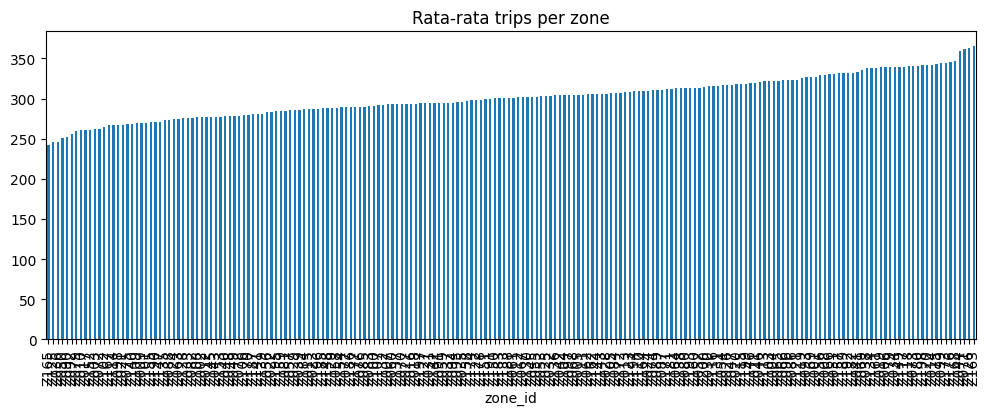

In [24]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values()
zone_mean.plot(kind='bar', figsize=(12, 4), title='Rata-rata trips per zone')

In [25]:
zone_mean = df_merged.groupby('zone_id')['trips_thousands'].mean().sort_values(ascending=False)

print(zone_mean)

zone_id
Z163    365.342880
Z126    363.241272
Z071    361.954133
Z044    359.149613
Z168    346.274665
           ...    
Z090    252.362323
Z050    251.508476
Z036    245.544960
Z125    245.419417
Z165    241.576508
Name: trips_thousands, Length: 200, dtype: float64


In [26]:
print(zone_mean.nunique(), df_merged['zone_id'].nunique())

200 200


In [27]:
# Standardize capitalization
df_merged['age_group'] = df_merged['age_group'].str.upper()
df_merged['commute_preference'] = df_merged['commute_preference'].str.upper()
df_merged['transit_type'] = df_merged['transit_type'].str.upper()

for col in object_cols:
    print(f"\n🟨 Kolom: {col}")
    print(df_merged[col].unique())


🟨 Kolom: zone_id
['Z029' 'Z084' 'Z103' 'Z061' 'Z009' 'Z131' 'Z010' 'Z081' 'Z128' 'Z129'
 'Z191' 'Z172' 'Z130' 'Z030' 'Z116' 'Z071' 'Z066' 'Z056' 'Z115' 'Z151'
 'Z006' 'Z095' 'Z048' 'Z026' 'Z161' 'Z200' 'Z136' 'Z166' 'Z076' 'Z093'
 'Z180' 'Z023' 'Z169' 'Z108' 'Z083' 'Z046' 'Z041' 'Z047' 'Z100' 'Z050'
 'Z004' 'Z088' 'Z065' 'Z019' 'Z155' 'Z197' 'Z174' 'Z033' 'Z086' 'Z013'
 'Z148' 'Z097' 'Z017' 'Z194' 'Z164' 'Z087' 'Z075' 'Z040' 'Z118' 'Z096'
 'Z051' 'Z109' 'Z153' 'Z091' 'Z165' 'Z012' 'Z146' 'Z113' 'Z054' 'Z089'
 'Z045' 'Z069' 'Z121' 'Z199' 'Z185' 'Z133' 'Z077' 'Z072' 'Z049' 'Z171'
 'Z067' 'Z189' 'Z032' 'Z173' 'Z184' 'Z152' 'Z092' 'Z170' 'Z181' 'Z157'
 'Z186' 'Z163' 'Z008' 'Z179' 'Z143' 'Z149' 'Z112' 'Z003' 'Z195' 'Z187'
 'Z028' 'Z025' 'Z132' 'Z126' 'Z079' 'Z020' 'Z062' 'Z038' 'Z064' 'Z015'
 'Z110' 'Z140' 'Z159' 'Z035' 'Z085' 'Z139' 'Z145' 'Z144' 'Z107' 'Z074'
 'Z057' 'Z002' 'Z141' 'Z016' 'Z044' 'Z137' 'Z090' 'Z177' 'Z022' 'Z198'
 'Z168' 'Z082' 'Z183' 'Z147' 'Z190' 'Z117' 'Z070' 'Z059' 'Z

In [28]:
ordinal_maps = {
    'age_group': {'Y': 0, 'A': 1, 'S': 2, 'a': 1, 's': 2},
    'traffic_congestion': {'L': 0, 'M': 1, 'H': 2}
}
df_merged.replace(ordinal_maps, inplace=True)

df_merged = pd.get_dummies(df_merged, columns=['event_type', 'commute_preference', 'transit_type'])

C:\Users\User\AppData\Local\Temp\ipykernel_19228\2493089103.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace(ordinal_maps, inplace=True)


In [29]:
# Mapping dari zone_id ke zone_mean
zone_mean_map = zone_mean.to_dict()

# Buat kolom baru di df_merged
df_merged['zone_mean'] = df_merged['zone_id'].map(zone_mean_map)

df_merged.head(5)

,zone_id,date,trips_thousands,is_train,business_density,retail_count,event_count,tourist_visits,traffic_congestion,air_quality_index,...,station_count,event_type_C,event_type_N,event_type_S,commute_preference_B,commute_preference_T,transit_type_B,transit_type_M,transit_type_T,zone_mean
0,Z029,2025-02-24,291.223641,1,298.669647,43.0,2.0,858.0,0,127.735031,...,10.0,False,True,False,True,False,True,False,False,286.126812
1,Z084,2025-01-27,295.244786,1,260.256968,191.0,8.0,319.0,1,46.175101,...,8.0,False,True,False,True,False,False,False,True,307.282911
2,Z103,2025-01-31,312.233743,1,241.928361,81.0,7.0,375.0,1,30.457095,...,10.0,False,True,False,True,False,True,False,False,321.654426
3,Z061,2025-02-26,296.010680,1,249.451003,107.0,8.0,797.0,0,118.442864,...,9.0,False,True,False,True,False,False,False,True,301.264703
4,Z009,2025-01-17,262.210143,1,135.967328,110.0,7.0,149.0,0,2.988478,...,11.0,False,True,False,True,False,False,False,True,269.668344


## Outlier

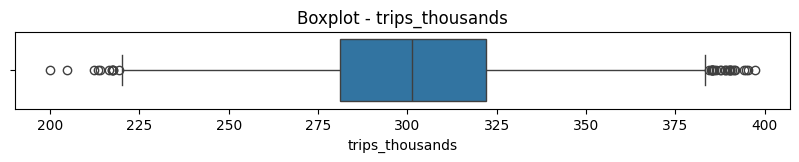

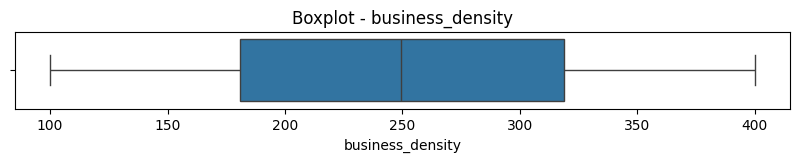

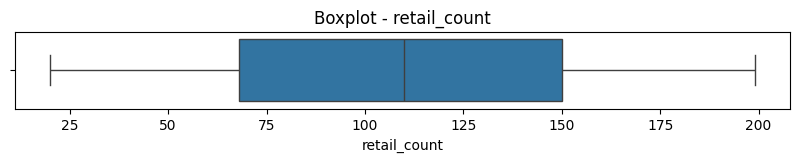

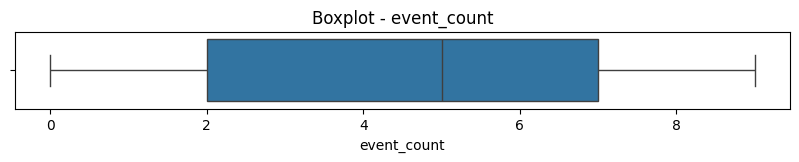

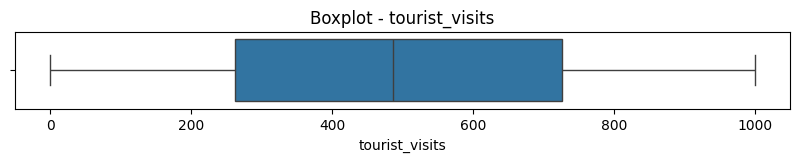

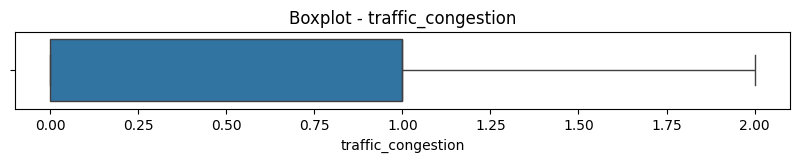

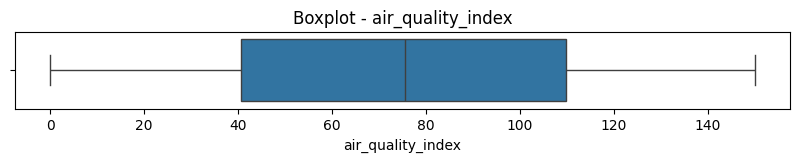

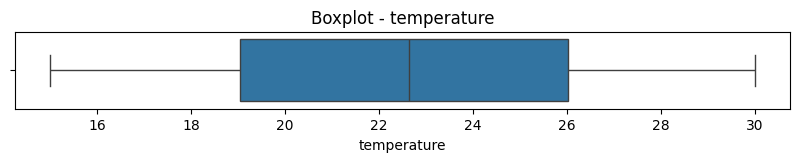

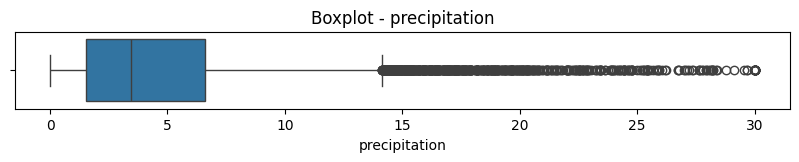

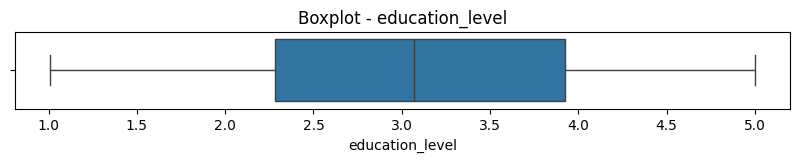

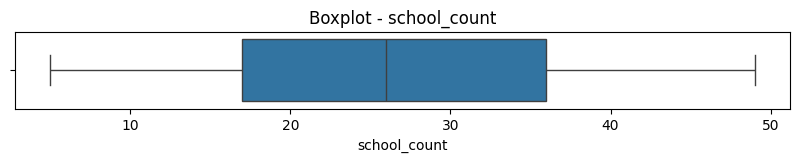

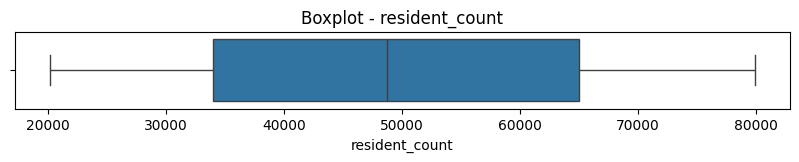

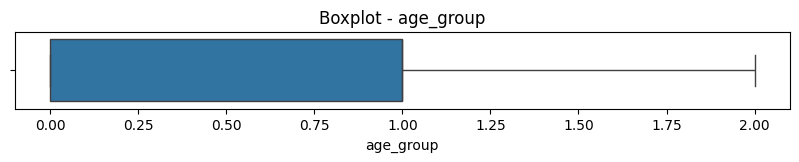

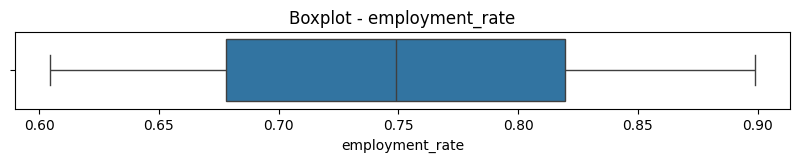

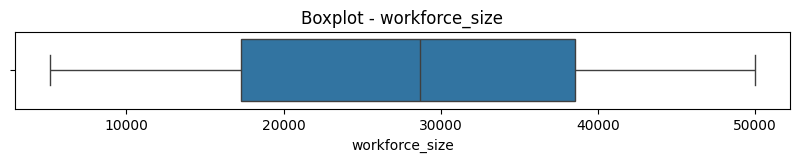

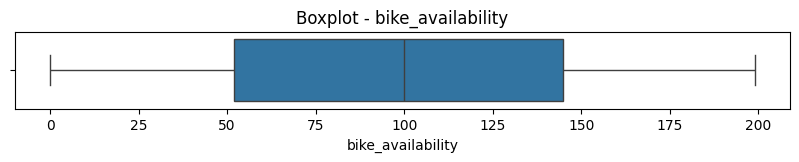

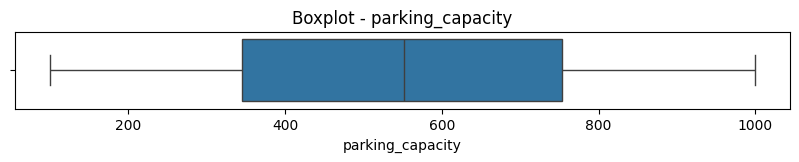

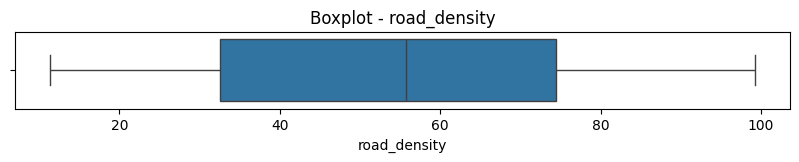

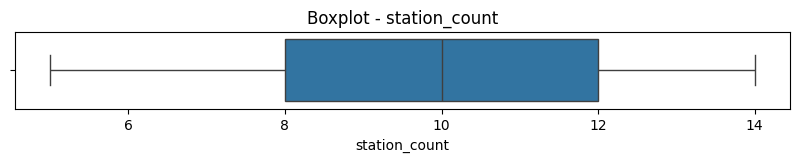

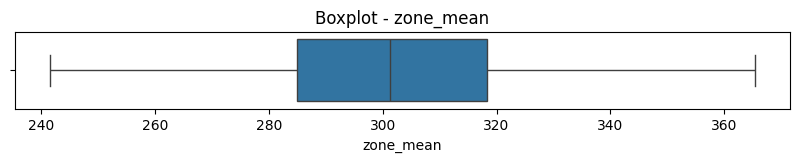

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns.drop('is_train')

for col in numerical_cols:
    plt.figure(figsize=(10, 1))
    sns.boxplot(data=df_merged, x=col)
    plt.title(f'Boxplot - {col}')
    plt.show()


In [31]:
# Statistik IQR untuk deteksi outlier
def check_outlier_stats(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

for col in numerical_cols:
    check_outlier_stats(df_merged, col)


trips_thousands: 36 outliers
business_density: 0 outliers
retail_count: 0 outliers
event_count: 0 outliers
tourist_visits: 0 outliers
traffic_congestion: 0 outliers
air_quality_index: 0 outliers
temperature: 0 outliers
precipitation: 673 outliers
education_level: 0 outliers
school_count: 0 outliers
resident_count: 0 outliers
age_group: 0 outliers
employment_rate: 0 outliers
workforce_size: 0 outliers
bike_availability: 0 outliers
parking_capacity: 0 outliers
road_density: 0 outliers
station_count: 0 outliers
zone_mean: 0 outliers


### Precipitation

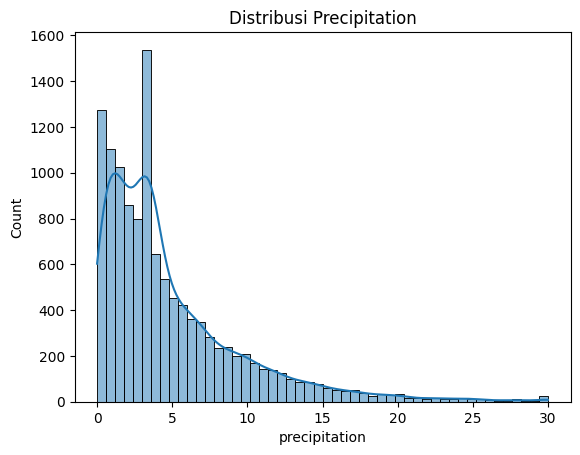

In [32]:
# Cek distribusi precipitation
import numpy as np
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation")
plt.show()


In [ ]:
# Salin data mentah (SEBELUM clipping apapun!)
before_clip = df_merged['precipitation'].copy()

# Hitung batas bawah & atas dari data mentah
q_low = before_clip.quantile(0.01)
q_high = before_clip.quantile(0.99)

# Clipping (Winsorize) dari data mentah
df_merged['precipitation'] = before_clip.clip(q_low, q_high)

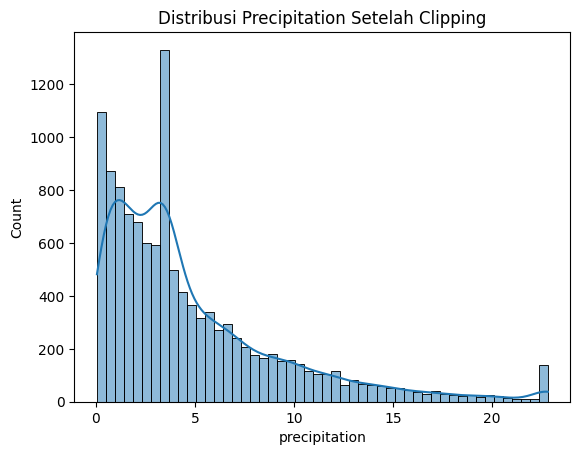

In [ ]:
# Cek distribusi setelah clipping
sns.histplot(df_merged['precipitation'], bins=50, kde=True)
plt.title("Distribusi Precipitation Setelah Clipping")
plt.show()

In [35]:
# 5. Validasi hasil clipping
print("Jumlah outlier sebelum clipping:", (before_clip > q_high).sum())
print("Jumlah outlier sesudah clipping:", (df_merged['precipitation'] > q_high).sum())
print("Nilai maksimum sekarang:", df_merged['precipitation'].max())

Jumlah outlier sebelum clipping: 120
Jumlah outlier sesudah clipping: 0
Nilai maksimum sekarang: 22.812521822732737


### Trips Thousands

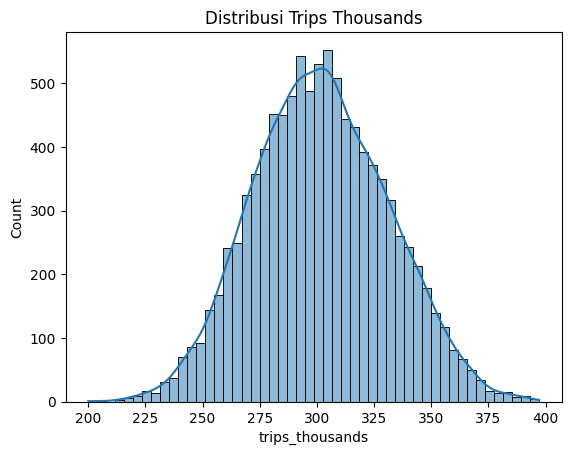

In [36]:
# Cek distribusi trips_thousands
import numpy as np
sns.histplot(df_merged['trips_thousands'], bins=50, kde=True)
plt.title("Distribusi Trips Thousands")
plt.show()

## Correlation

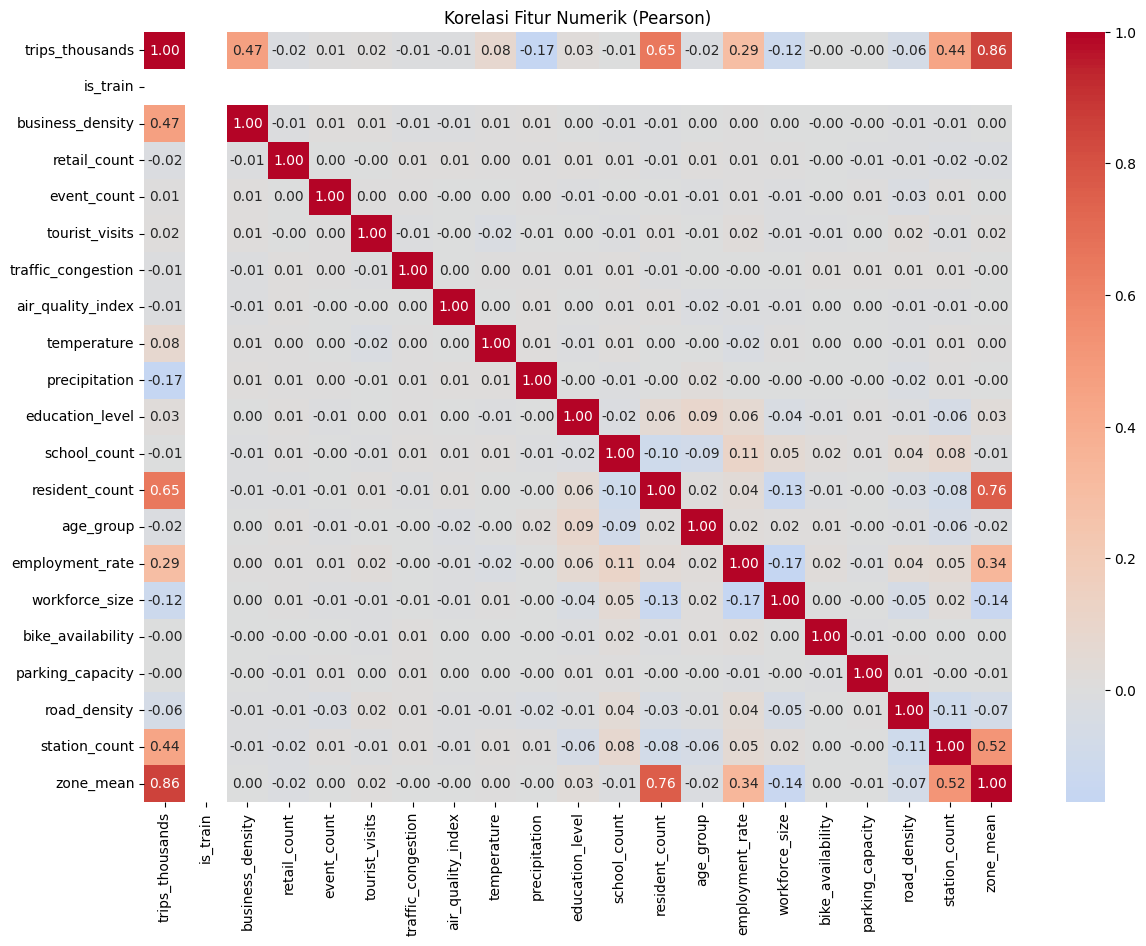

In [37]:
# Ambil hanya data latih (tanpa NaN di target)
df_train_only = df_merged[df_merged['is_train'] == 1].copy()

# Pilih kolom numerik
numerical_cols = df_train_only.select_dtypes(include='number').columns

# Hitung korelasi Pearson
corr_matrix = df_train_only[numerical_cols].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Korelasi Fitur Numerik (Pearson)")
plt.show()


In [38]:
# Korelasi hanya terhadap target
target_corr = corr_matrix['trips_thousands'].sort_values(ascending=False)
print("Korelasi fitur terhadap trips_thousands:")
print(target_corr)


Korelasi fitur terhadap trips_thousands:
trips_thousands       1.000000
zone_mean             0.857663
resident_count        0.651651
business_density      0.465014
station_count         0.443770
employment_rate       0.294374
temperature           0.079426
education_level       0.025483
tourist_visits        0.016456
event_count           0.007780
bike_availability    -0.002879
parking_capacity     -0.004405
school_count         -0.005616
traffic_congestion   -0.006620
air_quality_index    -0.007123
age_group            -0.015503
retail_count         -0.019344
road_density         -0.063550
workforce_size       -0.119147
precipitation        -0.170321
is_train                   NaN
Name: trips_thousands, dtype: float64


# Model Building

In [39]:
df_train = df_merged[df_merged['is_train'] == 1].copy()
df_test = df_merged[df_merged['is_train'] == 0].copy()

print(df_train.columns.tolist())

['zone_id', 'date', 'trips_thousands', 'is_train', 'business_density', 'retail_count', 'event_count', 'tourist_visits', 'traffic_congestion', 'air_quality_index', 'temperature', 'precipitation', 'education_level', 'school_count', 'resident_count', 'age_group', 'employment_rate', 'workforce_size', 'bike_availability', 'parking_capacity', 'road_density', 'station_count', 'event_type_C', 'event_type_N', 'event_type_S', 'commute_preference_B', 'commute_preference_T', 'transit_type_B', 'transit_type_M', 'transit_type_T', 'zone_mean']


In [40]:
drop_cols = ['zone_id', 'zone_mean', 'date', 'is_train', 'trips_thousands'] 
fitur_dipakai = [col for col in df_train.columns if col not in drop_cols]

X = df_train[fitur_dipakai]
y = df_train['trips_thousands']


### Feature Engineering

In [41]:
from sklearn.preprocessing import StandardScaler
# 3️⃣ Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
from sklearn.preprocessing import PolynomialFeatures

# 4️⃣ Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

In [43]:
# 5️⃣ Feature Mapping Node
n_fmn = 20
W_fmn = np.random.randn(X_poly.shape[1], n_fmn)
b_fmn = np.random.randn(n_fmn)
Z_fmn = np.tanh(X_poly @ W_fmn + b_fmn)

In [44]:
# 6️⃣ Enhancement Node
n_enh = 20
W_enh = np.random.randn(Z_fmn.shape[1], n_enh)
b_enh = np.random.randn(n_enh)
Z_enh = np.tanh(Z_fmn @ W_enh + b_enh)

In [45]:
X_bls = np.hstack([X_scaled, X_poly, Z_fmn, Z_enh])

### Baseline Model

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# 8️⃣ Split train/val
X_train, X_val, y_train, y_val = train_test_split(X_bls, y, test_size=0.2, random_state=42)

# 9️⃣ Train KNN
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train, y_train)

# 🔟 Predict
y_pred = knn_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"📉 RMSE BLS + KNN: {rmse:.4f}")

📉 RMSE BLS + KNN: 13.2198


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Learning Curve

C:\Users\User\AppData\Local\Temp\ipykernel_19228\4206536725.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


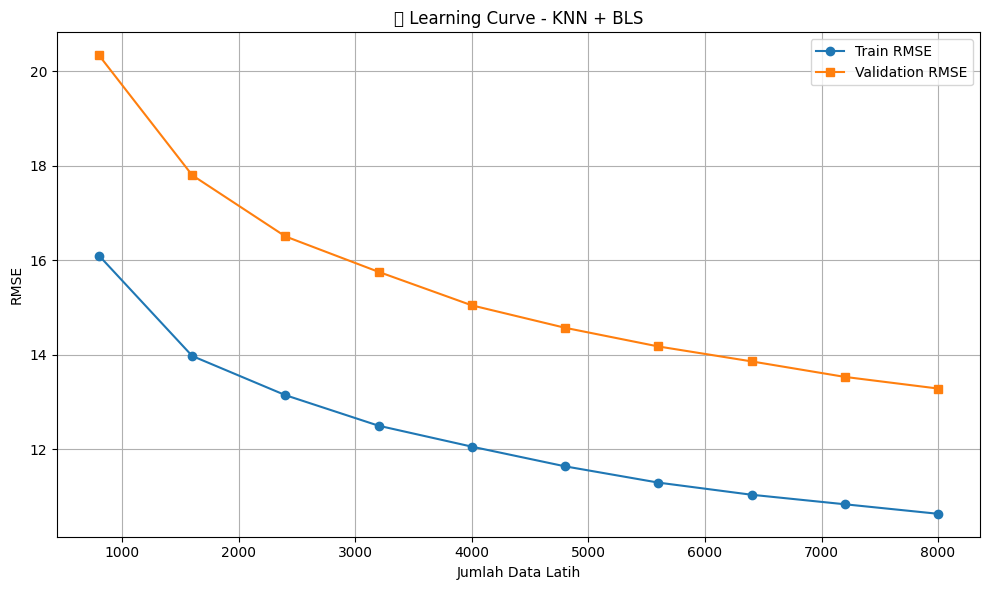

In [48]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# 🔁 Inisialisasi model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')

# 📈 Hitung learning curve
train_sizes, train_scores, val_scores = learning_curve(
    estimator=knn_model,
    X=X_bls,
    y=y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,            # boleh shuffle karena ini bukan time-series
    random_state=42,
    n_jobs=-1
)

# 📊 Hitung rata-rata RMSE
train_rmse = -np.mean(train_scores, axis=1)
val_rmse = -np.mean(val_scores, axis=1)

# 🎨 Plot Learning Curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, label='Train RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='s')
plt.title('📈 Learning Curve - KNN + BLS')
plt.xlabel('Jumlah Data Latih')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Parameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 11, 14, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5,
                    scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(X_bls, y)
print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RMSE: 12.056675087262269
Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


C:\Users\User\AppData\Local\Temp\ipykernel_19228\2693433818.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


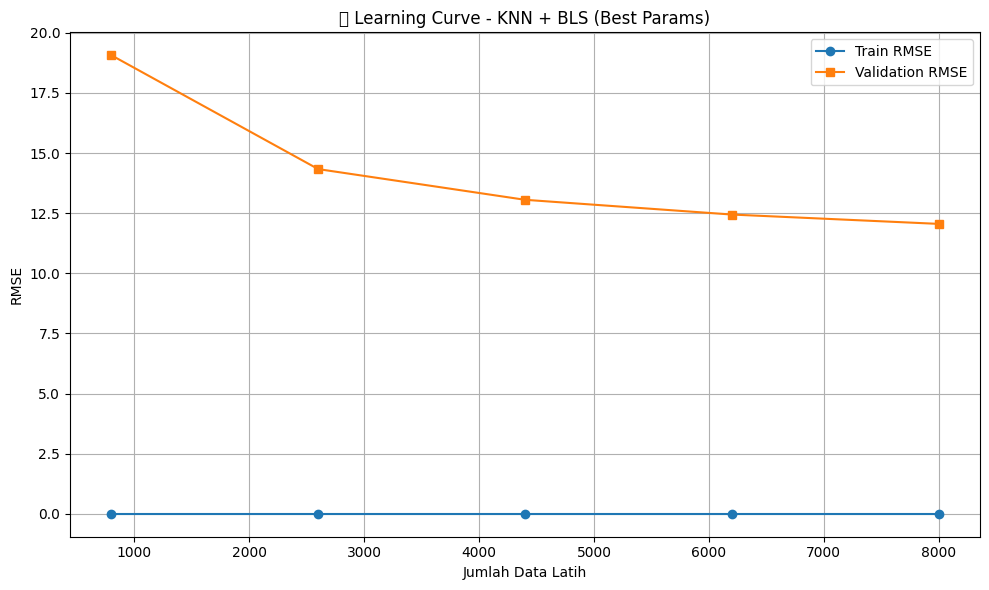

In [ ]:

model_best = KNeighborsRegressor(
    metric='manhattan',
    n_neighbors=7,
    weights='distance'
)

train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes_abs, train_scores, val_scores = learning_curve(
    model_best,
    X_bls,
    y,
    train_sizes=train_sizes,
    cv=5,
    scoring='neg_root_mean_squared_error',
    shuffle=False
)

train_rmse = -train_scores.mean(axis=1)
val_rmse = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_abs, train_rmse, label='Train RMSE', marker='o')
plt.plot(train_sizes_abs, val_rmse, label='Validation RMSE', marker='s')
plt.title("📈 Learning Curve - KNN + BLS (Best Params)")
plt.xlabel("Jumlah Data Latih")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarakan plot, dapat disimpulkan bahwa knn yang menggunakan best parameter itu overfit. Dia gagal generalisasi ke data baru.

# Submission

In [57]:
# 1️⃣ Siapkan test set mentah (pastikan urutan kolom sama seperti training)
X_test_raw = df_test[fitur_dipakai]

# 2️⃣ Scaling menggunakan scaler yang sudah fit
X_test_scaled = scaler.transform(X_test_raw)

# 3️⃣ Polynomial Features (gunakan poly yang sudah fit)
X_test_poly = poly.transform(X_test_scaled)

# 4️⃣ Feature Mapping Node (pakai W_fmn dan b_fmn dari training)
Z_fmn_test = np.tanh(X_test_poly @ W_fmn + b_fmn)

# 5️⃣ Enhancement Node (pakai W_enh dan b_enh dari training)
Z_enh_test = np.tanh(Z_fmn_test @ W_enh + b_enh)

# 6️⃣ Gabungkan semuanya jadi input akhir untuk KNN
X_test_bls = np.hstack([X_test_scaled, X_test_poly, Z_fmn_test, Z_enh_test])


In [58]:
y_test_pred = knn_model.predict(X_test_bls)

In [59]:
df_test_raw = pd.read_csv("mobility_test.csv")
submission = pd.DataFrame({
    "ID": df_test_raw["ID"],
    "trips_thousands": y_test_pred
})

In [60]:
submission.to_csv("knn_bls.csv", index=False)

In [61]:
print(submission.head())
print(submission.shape)  # Harus 2000 rows x 2 kolom

       ID  trips_thousands
0  ID0001       297.506035
1  ID0002       312.319194
2  ID0003       320.368881
3  ID0004       307.802181
4  ID0005       276.651063
(2000, 2)
